## Impute missing data needed for the final models
Use Linear Regression Models, Median/Mean Estimations, and classification models as needed to complete the dataset

**Matt Paterson, hello@hireMattPaterson.com**<br>
**Machine Learning Engineer**<br>
**Cloud Brigade, Santa Cruz, CA**

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.ensemble          import GradientBoostingRegressor
from sklearn.linear_model      import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection   import train_test_split, cross_val_score
from sklearn.cluster           import KMeans
from sklearn.decomposition     import PCA
from sklearn.preprocessing     import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics           import r2_score, mean_squared_error

## Import the data sets

In [2]:
path_to_home = '../'
datapath = path_to_home + 'data/'

In [3]:
cov_inc = pd.read_csv(datapath + 'incorporated_covid_dataset.csv')
snap_states = pd.read_csv(datapath + 'incl_SNAP_data_covid_set.csv')

In [4]:
cov_inc.head(2)

county-state state_abr     state        county  confirmed_cases  \
0    Waynesboro, Virginia        VA  Virginia    Waynesboro            326.0   
1  Williamsburg, Virginia        VA  Virginia  Williamsburg            205.0   

   deaths   latitude  longitude     fips  percapita_income  ...   FIPS_y  \
0     3.0  38.069722 -78.894444  51820.0               NaN  ...  51820.0   
1     8.0  37.270800 -76.706900  51830.0               NaN  ...  51830.0   

   SNAP_PA_Participation_Persons  SNAP_NPA_Participation_Persons  \
0                          433.0                          2324.0   
1                          126.0                           950.0   

   SNAP_All_Participation_Persons  SNAP_PA_Participation_Households  \
0                          2757.0                             308.0   
1                          1076.0                              83.0   

   SNAP_NPA_Participation_Households  SNAP_All_Participation_Households  \
0                             1105.0                             1413.0   
1                              444.0                              527.0   

   SNAP_All_Issuance  deaths_per_100k  cases_per_100k  
0           573642.0              NaN             NaN  
1           263247.0              NaN             NaN  

[2 rows x 44 columns]

In [5]:
snap_states.head(2)

state_abr     state        county  confirmed_cases  deaths   latitude  \
0        VA  Virginia    Waynesboro            326.0     3.0  38.069722   
1        VA  Virginia  Williamsburg            205.0     8.0  37.270800   

   longitude     fips            county-state  percapita_income  ...  \
0 -78.894444  51820.0    Waynesboro, Virginia               NaN  ...   
1 -76.706900  51830.0  Williamsburg, Virginia               NaN  ...   

   SNAP_PA_Participation_Persons  SNAP_NPA_Participation_Persons  \
0                          433.0                          2324.0   
1                          126.0                           950.0   

   SNAP_All_Participation_Persons  SNAP_PA_Participation_Households  \
0                          2757.0                             308.0   
1                          1076.0                              83.0   

   SNAP_NPA_Participation_Households  SNAP_All_Participation_Households  \
0                             1105.0                             1413.0   
1                              444.0                              527.0   

   SNAP_All_Issuance  deaths_per_100k  cases_per_100k  SNAP_per_100k  
0           573642.0              NaN             NaN            NaN  
1           263247.0              NaN             NaN            NaN  

[2 rows x 45 columns]

In [6]:
cov_inc.set_index('county-state', inplace=True)
snap_states.set_index('county-state', inplace=True)

## Isolate the smallest set of nulls and figure out a way to impute those fields

In [7]:
cov_inc.isna().sum()

state_abr                               0
state                                   0
county                                  0
confirmed_cases                         0
deaths                                  0
latitude                                0
longitude                               0
fips                                    0
percapita_income                      204
median_household_income               204
median_family_income                  204
number_of_households                  204
Population                             64
pct_white                              64
pct_black                              64
pct_asian                              64
pct_hispanic                           64
pct_native_american                    64
pct_hawaiian                           64
geo_id                                687
rental_percent_over_35_pcnt_income    687
rental_percent_LIHTC                  688
State_Abbr                              0
County_Name                       

In [8]:
cov_inc[cov_inc['Population'].isna()]

state_abr     state               county  \
county-state                                                           
Waynesboro, Virginia               VA  Virginia           Waynesboro   
Williamsburg, Virginia             VA  Virginia         Williamsburg   
Winchester, Virginia               VA  Virginia           Winchester   
Alexandria, Virginia               VA  Virginia           Alexandria   
Bristol, Virginia                  VA  Virginia              Bristol   
...                               ...       ...                  ...   
Southeast Fairbanks, Alaska        AK    Alaska  Southeast Fairbanks   
Valdez-Cordova, Alaska             AK    Alaska       Valdez-Cordova   
Wrangell, Alaska                   AK    Alaska             Wrangell   
Yukon-Koyukuk, Alaska              AK    Alaska        Yukon-Koyukuk   
St. Louis, Missouri                MO  Missouri            St. Louis   

                             confirmed_cases  deaths   latitude   longitude  \
county-state                                                                  
Waynesboro, Virginia                   326.0     3.0  38.069722  -78.894444   
Williamsburg, Virginia                 205.0     8.0  37.270800  -76.706900   
Winchester, Virginia                   528.0     4.0  39.178300  -78.166700   
Alexandria, Virginia                  4009.0    73.0  38.804722  -77.047222   
Bristol, Virginia                      210.0     7.0  36.611100  -82.176200   
...                                      ...     ...        ...         ...   
Southeast Fairbanks, Alaska             47.0     0.0  63.770000 -143.600000   
Valdez-Cordova, Alaska                 134.0     0.0  61.400000 -144.500000   
Wrangell, Alaska                        19.0     0.0  56.470830 -132.376670   
Yukon-Koyukuk, Alaska                   90.0     2.0  65.700000 -152.716670   
St. Louis, Missouri                   7528.0   217.0  38.616667  -90.200000   

                                fips  percapita_income  \
county-state                                             
Waynesboro, Virginia         51820.0               NaN   
Williamsburg, Virginia       51830.0               NaN   
Winchester, Virginia         51840.0               NaN   
Alexandria, Virginia         51510.0               NaN   
Bristol, Virginia            51520.0               NaN   
...                              ...               ...   
Southeast Fairbanks, Alaska   2240.0               NaN   
Valdez-Cordova, Alaska        2261.0               NaN   
Wrangell, Alaska              2275.0               NaN   
Yukon-Koyukuk, Alaska         2290.0               NaN   
St. Louis, Missouri          29510.0               NaN   

                             median_household_income  ...   FIPS_y  \
county-state                                          ...            
Waynesboro, Virginia                             NaN  ...  51820.0   
Williamsburg, Virginia                           NaN  ...  51830.0   
Winchester, Virginia                             NaN  ...  51840.0   
Alexandria, Virginia                             NaN  ...  51510.0   
Bristol, Virginia                                NaN  ...  51520.0   
...                                              ...  ...      ...   
Southeast Fairbanks, Alaska                      NaN  ...      NaN   
Valdez-Cordova, Alaska                           NaN  ...      NaN   
Wrangell, Alaska                                 NaN  ...      NaN   
Yukon-Koyukuk, Alaska                            NaN  ...      NaN   
St. Louis, Missouri                              NaN  ...      NaN   

                             SNAP_PA_Participation_Persons  \
county-state                                                 
Waynesboro, Virginia                                 433.0   
Williamsburg, Virginia                               126.0   
Winchester, Virginia                                 343.0   
Alexandria, Virginia                                1756.0   
Bristol, Virginia        

For Virginia and Alaska and St. Louis, Missouri, we don't have the reported demographics data. Double check that.

In [9]:
missing = cov_inc[['state', 'county']][cov_inc['Population'].isna()].index
for place in missing:
    print(place)

Waynesboro, Virginia
Williamsburg, Virginia
Winchester, Virginia
Alexandria, Virginia
Bristol, Virginia
Buena Vista, Virginia
Charlottesville, Virginia
Chesapeake, Virginia
Colonial Heights, Virginia
Covington, Virginia
Danville, Virginia
Emporia, Virginia
Fairfax, Virginia
Falls Church, Virginia
Franklin, Virginia
Fredericksburg, Virginia
Galax, Virginia
Hampton, Virginia
Harrisonburg, Virginia
Hopewell, Virginia
Lexington, Virginia
Lynchburg, Virginia
Manassas, Virginia
Manassas Park, Virginia
Martinsville, Virginia
Newport News, Virginia
Norfolk, Virginia
Norton, Virginia
Petersburg, Virginia
Poquoson, Virginia
Portsmouth, Virginia
Radford, Virginia
Richmond, Virginia
Roanoke, Virginia
Salem, Virginia
Staunton, Virginia
Suffolk, Virginia
Virginia Beach, Virginia
Baltimore, Maryland
Aleutians East, Alaska
Aleutians West, Alaska
Bethel, Alaska
Bristol Bay, Alaska
Denali, Alaska
Dillingham, Alaska
Fairbanks North Star, Alaska
Haines, Alaska
Juneau, Alaska
Ketchikan Gateway, Alaska
Kodi

## Delete these fields
For now, we can drop Alaska and Virginia from the data set. It would be best to add the data for Virginia from another source (wikipedia?) but for now let's push forward and use that data to help impute other missing data.

In [10]:
cov_inc = cov_inc[cov_inc['Population'].notnull()]
cov_inc.shape

(3070, 43)

In [11]:
cov_inc.isna().sum()

state_abr                               0
state                                   0
county                                  0
confirmed_cases                         0
deaths                                  0
latitude                                0
longitude                               0
fips                                    0
percapita_income                      140
median_household_income               140
median_family_income                  140
number_of_households                  140
Population                              0
pct_white                               0
pct_black                               0
pct_asian                               0
pct_hispanic                            0
pct_native_american                     0
pct_hawaiian                            0
geo_id                                660
rental_percent_over_35_pcnt_income    660
rental_percent_LIHTC                  661
State_Abbr                              0
County_Name                       

In [12]:
cov_inc.drop(columns=['FIPS_x', 'FIPS_y'], inplace=True)
cov_inc.shape

(3070, 41)

## Build a linear regression model to predict the percapita earnings based on the current non-null fields

In [13]:
non_nulls = [
    'confirmed_cases',
    'deaths',
    'Population',
    'pct_white',
    'pct_black',
    'pct_asian',
    'pct_hispanic',
    'pct_native_american',
    'pct_hawaiian',
    'deaths_per_100k',
    'cases_per_100k'
]

unknown_values = [
    'percapita_income',
    'median_household_income',
    'median_family_income',
    'number_of_households'
]

In [14]:
#cov_inc[non_nulls].isna().sum()
cov_inc[non_nulls].dtypes


confirmed_cases        float64
deaths                 float64
Population             float64
pct_white              float64
pct_black              float64
pct_asian              float64
pct_hispanic           float64
pct_native_american    float64
pct_hawaiian           float64
deaths_per_100k        float64
cases_per_100k         float64
dtype: object

In [15]:
df = cov_inc[cov_inc['percapita_income'].notnull()]
df.shape

(2930, 41)

In [16]:
df_unk = cov_inc[cov_inc['percapita_income'].isnull()]
df_unk.shape

(140, 41)

In [17]:
# Instantiate a Linear Regression Model
lr = LinearRegression()

## Train a Linear Regression model to predict the missing values.

In [18]:
X = df[non_nulls]
y = df['percapita_income']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.2,
                                                   random_state=42)

In [19]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('training score : ', lr.score(X_train, y_train))
print('test score     : ', lr.score(X_test, y_test))

training score :  0.35495580876531097
test score     :  0.33800737205405307


Try using a Gradient Boosting Regressor

In [21]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
print('training score : ', gb.score(X_train, y_train))
print('test score     : ', gb.score(X_test, y_test))

training score :  0.6708361944543195
test score     :  0.5116417404658771


That's not a good starting score. However, we can use BEA data that is harder to explain but useful to predict the percapita income and other information.

In [23]:
bea = pd.read_csv(datapath + 'bea_stats.csv')
bea.set_index('county-state', inplace=True)
bea.head()

date  state  confirmed_cases  deaths  latitude  \
county-state                                                                    
Lavaca County, Texas     2020-09-16  Texas            705.0    33.0     29.38   
Lee County, Texas        2020-09-16  Texas            211.0    14.0     30.31   
Leon County, Texas       2020-09-16  Texas            225.0     5.0     31.30   
Liberty County, Texas    2020-09-16  Texas           2201.0    47.0     30.15   
Limestone County, Texas  2020-09-16  Texas            536.0    10.0     31.54   

                         longitude  average_temperature_celsius  rainfall_mm  \
county-state                                                                   
Lavaca County, Texas        -96.94                    26.992063     1.161143   
Lee County, Texas           -96.96                    26.625000     0.095250   
Leon County, Texas          -96.00                    25.805556     0.095250   
Liberty County, Texas       -94.81                    28.626984     0.000000   
Limestone County, Texas     -96.58                    25.370370     0.000000   

                            fips  AK  ...      Year  \
county-state                          ...             
Lavaca County, Texas     48285.0   0  ...  1/1/2018   
Lee County, Texas        48287.0   0  ...  1/1/2018   
Leon County, Texas       48289.0   0  ...  1/1/2018   
Liberty County, Texas    48291.0   0  ...  1/1/2018   
Limestone County, Texas  48293.0   0  ...  1/1/2018   

                         Employer_contrib_govt_and_social_insurance  \
county-state                                                          
Lavaca County, Texas                                        17707.0   
Lee County, Texas                                           25423.0   
Leon County, Texas                                          19083.0   
Liberty County, Texas                                       60845.0   
Limestone County, Texas                                     22449.0   

                         Income_maintenance_benefits  \
county-state                                           
Lavaca County, Texas                         11968.0   
Lee County, Texas                            10241.0   
Leon County, Texas                           12464.0   
Liberty County, Texas                        76126.0   
Limestone County, Texas                      20839.0   

                         Percapita_unemployment_insurance_compensation  \
county-state                                                             
Lavaca County, Texas                                              52.0   
Lee County, Texas                                                 64.0   
Leon County, Texas                                                67.0   
Liberty County, Texas                                             85.0   
Limestone County, Texas                                           63.0   

                         Wages_and_salaries_supplement  \
county-state                                             
Lavaca County, Texas                           63289.0   
Lee County, Texas                              82595.0   
Leon County, Texas                             61160.0   
Liberty County, Texas                         216436.0   
Limestone County, Texas                       104346.0   

                         Wages_and_salaries_avg  \
county-state                                      
Lavaca County, Texas                    38553.0   
Lee County, Texas                       50270.0   
Leon County, Texas                      51582.0   
Liberty County, Texas                   46503.0   
Limestone County, Texas                 42817.0   

                         Net_earnings_by_place_of_residence  \
county-state                                                  
Lavaca County, Texas                               527264.0   
Lee County, Texas                                  474553.0   
Leon County, Texas                                 346759.0   
Liberty County, Texas     

In [24]:
bea = bea[['Employer_contrib_govt_and_social_insurance', 'Income_maintenance_benefits',
         'Percapita_unemployment_insurance_compensation', 'Wages_and_salaries_supplement',
         'Wages_and_salaries_avg', 'Net_earnings_by_place_of_residence', 
         'Percapita_personal_income', 'jobs']]
bea.shape

(3076, 8)

In [25]:
bea.isna().sum()

Employer_contrib_govt_and_social_insurance       0
Income_maintenance_benefits                      0
Percapita_unemployment_insurance_compensation    0
Wages_and_salaries_supplement                    0
Wages_and_salaries_avg                           0
Net_earnings_by_place_of_residence               0
Percapita_personal_income                        0
jobs                                             0
dtype: int64

In [26]:
bea.dtypes

Employer_contrib_govt_and_social_insurance       float64
Income_maintenance_benefits                      float64
Percapita_unemployment_insurance_compensation    float64
Wages_and_salaries_supplement                    float64
Wages_and_salaries_avg                           float64
Net_earnings_by_place_of_residence               float64
Percapita_personal_income                        float64
jobs                                             float64
dtype: object

In [27]:
non_nulls = non_nulls + ['Employer_contrib_govt_and_social_insurance', 'Income_maintenance_benefits',
         'Percapita_unemployment_insurance_compensation', 'Wages_and_salaries_supplement',
         'Wages_and_salaries_avg', 'Net_earnings_by_place_of_residence', 
         'Percapita_personal_income', 'jobs']
len(non_nulls)

19

In [28]:
df_bea = df.merge(bea, how='left', left_index=True, right_index=True)
df_bea.shape

(2930, 49)

In [29]:
df_unk_bea = df_unk.merge(bea, how='left', left_index=True, right_index=True)
df_unk_bea.shape

(140, 49)

In [30]:
bea_cols = [
    'Employer_contrib_govt_and_social_insurance', 'Income_maintenance_benefits',
         'Percapita_unemployment_insurance_compensation', 'Wages_and_salaries_supplement',
         'Wages_and_salaries_avg', 'Net_earnings_by_place_of_residence', 
         'Percapita_personal_income', 'jobs'
]

In [31]:
df_unk_bea= df_unk_bea[df_unk_bea['jobs'].notnull()]

In [32]:
df_unk_bea.isna().sum()

state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                 136
median_household_income                          136
median_family_income                             136
number_of_households                             136
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american                                0
pct_hawaiian                                  

In [33]:
df_bea.isna().sum()

state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american                                0
pct_hawaiian                                  

In [34]:
df_bea = df_bea[df_bea['jobs'].notnull()]

In [35]:
lr_2 = LinearRegression()
X = df_bea[non_nulls]
y = df_bea['percapita_income']

X_train_2, X_test_2, y_train, y_test = train_test_split(X, y,
                                                   test_size=.2,
                                                   random_state=42)

lr_2.fit(X_train_2, y_train)

print('Training Score: ', lr_2.score(X_train_2, y_train))
print('Test Scofre: ',lr_2.score(X_test_2, y_test))

Training Score:  0.7654721032028304
Test Scofre:  0.7803177834392503


In [36]:
df_bea[non_nulls].corr()

confirmed_cases    deaths  \
confirmed_cases                                       1.000000  0.851146   
deaths                                                0.851146  1.000000   
Population                                            0.948175  0.828614   
pct_white                                            -0.164141 -0.174120   
pct_black                                             0.118951  0.126733   
pct_asian                                             0.374692  0.378237   
pct_hispanic                                          0.224265  0.190429   
pct_native_american                                  -0.030785 -0.029088   
pct_hawaiian                                          0.062897  0.035657   
deaths_per_100k                                       0.133678  0.252642   
cases_per_100k                                        0.117518  0.084840   
Employer_contrib_govt_and_social_insurance            0.882281  0.757410   
Income_maintenance_benefits                           0.929162  0.882705   
Percapita_unemployment_insurance_compensation         0.043281  0.110157   
Wages_and_salaries_supplement                         0.895424  0.772360   
Wages_and_salaries_avg                                0.325091  0.319071   
Net_earnings_by_place_of_residence                    0.888893  0.783007   
Percapita_personal_income                             0.174846  0.190165   
jobs                                                  0.920534  0.777087   

                                               Population  pct_white  \
confirmed_cases                                  0.948175  -0.164141   
deaths                                           0.828614  -0.174120   
Population                                       1.000000  -0.161995   
pct_white                                       -0.161995   1.000000   
pct_black                                        0.099651  -0.875086   
pct_asian                                        0.497130  -0.205805   
pct_hispanic                                     0.194887   0.029906   
pct_native_american                             -0.041937  -0.338430   
pct_hawaiian                                     0.102592  -0.093308   
deaths_per_100k                                  0.097626  -0.475403   
cases_per_100k                                   0.034626  -0.426099   
Employer_contrib_govt_and_social_insurance       0.957868  -0.164735   
Income_maintenance_benefits                      0.942549  -0.176072   
Percapita_unemployment_insurance_compensation    0.079678   0.189619   
Wages_and_salaries_supplement                    0.970033  -0.164613   
Wages_and_salaries_avg                           0.411772  -0.098509   
Net_earnings_by_place_of_residence               0.968430  -0.157842   
Percapita_personal_income                        0.244491   0.155604   
jobs                                             0.980873  -0.165531   

                                               pct_black  pct_asian  \
confirmed_cases                                 0.118951   0.374692   
deaths                                          0.126733   0.378237   
Population                                      0.099651   0.497130   
pct_white                                      -0.875086  -0.205805   
pct_black                                       1.000000   0.045429   
pct_asian                                       0.045429   1.000000   
pct_hispanic                                   -0.078261   0.168748   
pct_native_american                            -0.118162  -0.037119   
pct_hawaiian                                   -0.014371   0.555812   
deaths_per_100k                                 0.488539   0.035180   
cases_per_100k                                  0.408078  -0.007255   
Employer_contrib_govt_and_social_insurance      0.093309   0.531216   
Income_maintenance_benefits                     0.127593   0.400283   
Percapita_unemployment_insurance_compensation  -0.246911   0.139876   
Wages_and_salaries_s

In [37]:
def per_100k(data, population):
    '''
    returns a new pd.Series by computing the percapita (per 100K) of any numerical Series
    data is a number, float or int usually
    '''
    try:
        return (data/population) * 100_000
    except:
        print('TypeError: The input data is not in float or int format')
        return 1

In [38]:
df_bea['jobs_per_100k'] = per_100k(df_bea['jobs'], df_bea['Population'])
df_bea['av_household_earnings_per_100k'] = per_100k(
    df_bea['Net_earnings_by_place_of_residence'],
    df_bea['Population']
)

df_unk_bea['jobs_per_100k'] = per_100k(df_unk_bea['jobs'], df_unk_bea['Population'])
df_unk_bea['av_household_earnings_per_100k'] = per_100k(
    df_unk_bea['Net_earnings_by_place_of_residence'],
    df_unk_bea['Population']
)

In [39]:
non_nulls.append('jobs_per_100k')
non_nulls.append('av_household_earnings_per_100k')

In [40]:
df_bea[non_nulls].corr()

confirmed_cases    deaths  \
confirmed_cases                                       1.000000  0.851146   
deaths                                                0.851146  1.000000   
Population                                            0.948175  0.828614   
pct_white                                            -0.164141 -0.174120   
pct_black                                             0.118951  0.126733   
pct_asian                                             0.374692  0.378237   
pct_hispanic                                          0.224265  0.190429   
pct_native_american                                  -0.030785 -0.029088   
pct_hawaiian                                          0.062897  0.035657   
deaths_per_100k                                       0.133678  0.252642   
cases_per_100k                                        0.117518  0.084840   
Employer_contrib_govt_and_social_insurance            0.882281  0.757410   
Income_maintenance_benefits                           0.929162  0.882705   
Percapita_unemployment_insurance_compensation         0.043281  0.110157   
Wages_and_salaries_supplement                         0.895424  0.772360   
Wages_and_salaries_avg                                0.325091  0.319071   
Net_earnings_by_place_of_residence                    0.888893  0.783007   
Percapita_personal_income                             0.174846  0.190165   
jobs                                                  0.920534  0.777087   
jobs_per_100k                                         0.130210  0.097460   
av_household_earnings_per_100k                        0.214546  0.220178   

                                               Population  pct_white  \
confirmed_cases                                  0.948175  -0.164141   
deaths                                           0.828614  -0.174120   
Population                                       1.000000  -0.161995   
pct_white                                       -0.161995   1.000000   
pct_black                                        0.099651  -0.875086   
pct_asian                                        0.497130  -0.205805   
pct_hispanic                                     0.194887   0.029906   
pct_native_american                             -0.041937  -0.338430   
pct_hawaiian                                     0.102592  -0.093308   
deaths_per_100k                                  0.097626  -0.475403   
cases_per_100k                                   0.034626  -0.426099   
Employer_contrib_govt_and_social_insurance       0.957868  -0.164735   
Income_maintenance_benefits                      0.942549  -0.176072   
Percapita_unemployment_insurance_compensation    0.079678   0.189619   
Wages_and_salaries_supplement                    0.970033  -0.164613   
Wages_and_salaries_avg                           0.411772  -0.098509   
Net_earnings_by_place_of_residence               0.968430  -0.157842   
Percapita_personal_income                        0.244491   0.155604   
jobs                                             0.980873  -0.165531   
jobs_per_100k                                    0.156822   0.002911   
av_household_earnings_per_100k                   0.293835   0.133881   

                                               pct_black  pct_asian  \
confirmed_cases                                 0.118951   0.374692   
deaths                                          0.126733   0.378237   
Population                                      0.099651   0.497130   
pct_white                                      -0.875086  -0.205805   
pct_black                                       1.000000   0.045429   
pct_asian                                       0.045429   1.000000   
pct_hispanic                                   -0.078261   0.168748   
pct_native_american                            -0.118162  -0.037119   
pct_hawaiian                                   -0.014371   0.555812   
deaths_per_100k                                 0.488539   0.035180   
cases_pe

In [41]:
df_bea['jobs_per_100k'].describe()

count      2904.000000
mean      37913.740281
std       16069.924282
min        6237.537706
25%       28610.579294
50%       36532.346814
75%       45146.709150
max      419257.821974
Name: jobs_per_100k, dtype: float64

The only reason that jobs, and many other features here, seem to have strong correlations to deaths is due to a direct linear correlation with the population. When we look at the deaths per 100k, se see that the strong correlation to jobs goes away. This observation is amplified by looking at jobs_per_100k. Specifically looking at jobs, the data that we are observing here are not acute enough to show a sudden factory closing or other such sudden changes to a local economy. Thus, by the normal ways that a free-market economy spurs migration, most counties will have a similar number of jobs per 100K and thus this won't have a large bearing or any significant correlation to the number of cases or deaths per capita.

In [42]:
lr_3 = LinearRegression()
X = df_bea[non_nulls]
y = df_bea['percapita_income']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.2,
                                                   random_state=42)

lr_3.fit(X_train, y_train)

print('Training Score: ', lr_3.score(X_train, y_train))
print('Test Score: ',lr_3.score(X_test, y_test))

Training Score:  0.7788663238302668
Test Score:  0.7860445583407824


In [43]:
y_preds = lr_3.predict(X_test)
y_true = y_test


In [44]:
print('R2 Scores')
print('*'*20)
print('lr_3 model: ', r2_score(y_true, y_preds))

print('RMSE Scores')
print('*'*20)
print('lr_3 model: ', (mean_squared_error(y_true, y_preds))*(1/2))

R2 Scores
********************
lr_3 model:  0.7860445583407824
RMSE Scores
********************
lr_3 model:  3063869.2587926714


In [45]:
print('RMSE Scores')
print('*'*20)
print('lr_2 model: ', (mean_squared_error(y_true, (lr_2.predict(X_test_2)))*(1/2)))

RMSE Scores
********************
lr_2 model:  3145877.407016247


## Use lr_2 to impute the missing percapita income data

In [46]:
df_unk_bea['percapita_income'] = lr_3.predict(df_unk_bea[non_nulls])
df_unk_bea.isna().sum()

state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                          136
median_family_income                             136
number_of_households                             136
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american                                0
pct_hawaiian                                  

In [47]:
reunite = df_bea.merge(df_unk_bea, how='outer')
reunite.shape

(3040, 51)

In [48]:
reunite.isna().sum()

state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                          136
median_family_income                             136
number_of_households                             136
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american                                0
pct_hawaiian                                  

## To use the Linear Regression Model for imputation, make a function:
1. Split the dataframe into two, one having all known targets and the other with unknown
2. Fit the OLS model with the known targets
3. Predict the unknown values
4. Merge the dataframes again

NOTES:
- Make sure that all of the created models have an r-squared score of at least 75%
- Double-check to be sure that this feature could not just be filled in using a mean or median score

In [49]:
# Establish the features to run the model on:
non_nulls

['confirmed_cases',
 'deaths',
 'Population',
 'pct_white',
 'pct_black',
 'pct_asian',
 'pct_hispanic',
 'pct_native_american',
 'pct_hawaiian',
 'deaths_per_100k',
 'cases_per_100k',
 'Employer_contrib_govt_and_social_insurance',
 'Income_maintenance_benefits',
 'Percapita_unemployment_insurance_compensation',
 'Wages_and_salaries_supplement',
 'Wages_and_salaries_avg',
 'Net_earnings_by_place_of_residence',
 'Percapita_personal_income',
 'jobs',
 'jobs_per_100k',
 'av_household_earnings_per_100k']

In [50]:
reunite['median_household_income'].describe()

count      2904.000000
mean      45644.221763
std       11512.383716
min       19986.000000
25%       38272.500000
50%       44069.500000
75%       50818.000000
max      122238.000000
Name: median_household_income, dtype: float64

In [51]:
predict_column = 'median_household_income'
data = reunite.copy()

df_kno = data[data[predict_column].notnull()]
df_unk = data[data[predict_column].isnull()]

In [52]:
model = LinearRegression()

X = df_kno[non_nulls]
y = df_kno[predict_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                   random_state=42)
model.fit(X_train, y_train)
print('training r2 score: ', model.score(X_train, y_train))
print('test r2 score    : ', model.score(X_test, y_test))

training r2 score:  0.7216161988704519
test r2 score    :  0.7480314107411626


Try using Ridge and Lasso regressions?

In [53]:
model_ridge = Ridge()

X = df_kno[non_nulls]
y = df_kno[predict_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                   random_state=42)
model_ridge.fit(X_train, y_train)
print('training r2 score: ', model_ridge.score(X_train, y_train))
print('test r2 score    : ', model_ridge.score(X_test, y_test))

training r2 score:  0.7202292167594975
test r2 score    :  0.7456095396627476


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58438e-18): result may not be accurate.
  overwrite_a=True).T


In [54]:
model_lasso = Lasso(max_iter=50_000)

X = df_kno[non_nulls]
y = df_kno[predict_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                   random_state=42)
model_lasso.fit(X_train, y_train)
print('training r2 score: ', model_lasso.score(X_train, y_train))
print('test r2 score    : ', model_lasso.score(X_test, y_test))

training r2 score:  0.7211207283383012
test r2 score    :  0.7473074266011437


In [55]:
mean_squared_error(y_test, model_lasso.predict(X_test))

31823524.99100579

The original OLS model ran better than these other ones did.

## Try using a GradientBoostingRegressor model

In [56]:
# code inspired by scikit-learn.org
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

gb_reg = GradientBoostingRegressor()

X = df_kno[non_nulls]
y = df_kno[predict_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                   random_state=42)
gb_reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, gb_reg.predict(X_test))
print("The mean squared error (MSE) on the test set: {:.4f}".format(mse))

The mean squared error (MSE) on the test set: 25857590.7345


In [57]:
print('training score: ',gb_reg.score(X_train, y_train))
print('testing score : ',gb_reg.score(X_test, y_test))

training score:  0.8899453480940802
testing score :  0.7946795288567868


In [58]:
# predict_column = 'median_household_income'
# data = reunite.copy()
# model = GradientBoostingRegressor()
# features = non_nulls

def predict_incomes(predict_column, data, model, features, test_size=0.2):
    '''
    returns a dataframe with predicted columns using a regressor model
    predict_column is the column name to be used as a target column
    data           is a pandas dataframe
    model          is the type of scikit-learn regressor
    features       is a list of the feature columns used in the model
    '''
    # from sklearn.ensemble          import GradientBoostingRegressor
    # from sklearn.linear_model      import LogisticRegression, LinearRegression, Ridge, Lasso
    # from sklearn.model_selection   import train_test_split, cross_val_score
    # from sklearn.metrics           import r2_score, mean_squared_error

    # 1. Split the dataframe into two, one having 
    #    all known targets and the other with unknown
    df_kno = data[data[predict_column].notnull()].copy()
    df_unk = data[data[predict_column].isnull()].copy()

    # 2. Fit the model with the known targets
    X = df_kno[features]
    y = df_kno[predict_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                       random_state=42)
    model.fit(X_train, y_train)
    print('training r2 score: ', model.score(X_train, y_train))
    print('test r2 score    : ', model.score(X_test, y_test))

    # 3. Predict the unknown values
    df_unk[predict_column] = model.predict(df_unk[features])
    # print for sanity check that the intended column is now not containing nulls 
    print(df_unk.isna().sum())
    
    # 4. Merge the dataframes again and return the reunion
    return df_kno.merge(df_unk, how='outer')
    

In [59]:
predict_column = 'median_household_income'
data = reunite.copy()
# model = GradientBoostingRegressor()
features = non_nulls

reunite = predict_incomes(predict_column, data, GradientBoostingRegressor(), features)
reunite.shape

training r2 score:  0.8899453480940802
test r2 score    :  0.7943433426216152
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                             136
number_of_households                             136
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american  

(3040, 51)

In [60]:
# impute 'median_family_income'
reunite = predict_incomes('median_family_income', reunite.copy(), 
                          GradientBoostingRegressor(), non_nulls)
reunite.shape

training r2 score:  0.8939177173382692
test r2 score    :  0.8046176591533225
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                             136
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american  

(3040, 51)

In [61]:
# impute 'number of households'
reunite = predict_incomes('number_of_households', reunite.copy(), 
                          GradientBoostingRegressor(), non_nulls)
reunite.shape

training r2 score:  0.9995848878878109
test r2 score    :  0.9852622872863722
state_abr                                         0
state                                             0
county                                            0
confirmed_cases                                   0
deaths                                            0
latitude                                          0
longitude                                         0
fips                                              0
percapita_income                                  0
median_household_income                           0
median_family_income                              0
number_of_households                              0
Population                                        0
pct_white                                         0
pct_black                                         0
pct_asian                                         0
pct_hispanic                                      0
pct_native_american                   

(3040, 51)

In [62]:
non_nulls.append('percapita_income')
non_nulls.append('median_household_income')
non_nulls.append('median_family_income')
non_nulls.append('number_of_households')

# non_nulls.remove('percapita_income')
# non_nulls.remove('median_household_income')
# non_nulls.remove('median_family_income')
# non_nulls.remove('number_of_households')

In [63]:
len(non_nulls)

25

In [64]:
reunite['rental_percent_over_35_pcnt_income'].describe()

count    2386.000000
mean       31.209430
std         7.445133
min         3.700000
25%        26.600000
50%        31.600000
75%        36.400000
max        61.100000
Name: rental_percent_over_35_pcnt_income, dtype: float64

In [65]:
# impute 'rental_percent_over_35_pcnt_income'
trial_frame = reunite.copy()
trail_frame = predict_incomes('rental_percent_over_35_pcnt_income', reunite.copy(), 
                          LinearRegression(), non_nulls)
trial_frame.shape

training r2 score:  0.271330100274243
test r2 score    :  0.26177750789768184
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american  

(3040, 51)

In [66]:
# impute 'rental_percent_over_35_pcnt_income' using GradientBoosting
trial_frame = reunite.copy()
trail_frame = predict_incomes('rental_percent_over_35_pcnt_income', reunite.copy(), 
                          GradientBoostingRegressor(n_estimators=500), non_nulls)
trial_frame.shape

training r2 score:  0.9002821868098106
test r2 score    :  0.4576563400236013
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american  

(3040, 51)

Since the 'rental_percent_over_35_pcnt_income' is not easily predicted by either of our regression models, we can use the mean value instead. As we can see above the standard deviation is only 7.4, the median is just above the mean, and we are making 654 predictions. Also this doesn't seem to be a huge influencer on our total model, so it should be OK to impute this data in this manner.

In [67]:
# IMPUTE THE 'rental_percent_over_35_pcnt_income' COL VALS USING MEDIAN

reunite['rental_percent_over_35_pcnt_income'] = np.mean(reunite['rental_percent_over_35_pcnt_income'])

In [68]:
reunite['rental_percent_over_35_pcnt_income'].isna().sum()

0

In [69]:
# impute 'rental_percent_LIHTC' using GradientBoosting
trial_frame = reunite.copy()
trail_frame = predict_incomes('rental_percent_LIHTC', reunite.copy(), 
                          GradientBoostingRegressor(n_estimators=500), non_nulls)
trial_frame.shape

training r2 score:  0.8926065680036147
test r2 score    :  0.17626383298283888
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american 

(3040, 51)

The r2 score on this prediction is only 18%, yet the training score is 89%. The model is clearly overfit. Can we fix this by changing the percentage of the data that we are testing on? Also, would a simple linear regression model simply work better?

In [70]:
# impute 'rental_percent_LIHTC' using GradientBoosting
trial_frame = reunite.copy()
trail_frame = predict_incomes('rental_percent_LIHTC', reunite.copy(), 
                          GradientBoostingRegressor(n_estimators=500), non_nulls,
                             test_size=.4)
trial_frame.shape

training r2 score:  0.9348133145442991
test r2 score    :  0.015089688946000046
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american

(3040, 51)

In [71]:
# impute 'rental_percent_LIHTC' using GradientBoosting
trial_frame = reunite.copy()
trail_frame = predict_incomes('rental_percent_LIHTC', reunite.copy(), 
                          LinearRegression(), non_nulls,
                             test_size=.2)
trial_frame.shape

training r2 score:  0.08391995515269324
test r2 score    :  0.029043230415350285
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_america

(3040, 51)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


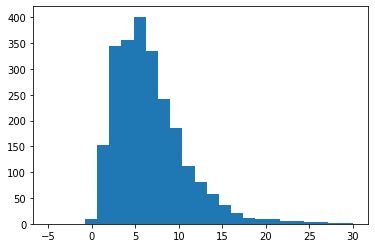

In [72]:
plt.hist(reunite['rental_percent_LIHTC'], bins=25, range=(-5, 30));

In [73]:
reunite['rental_percent_LIHTC'].describe()

count    2385.000000
mean        6.743145
std         5.053743
min         0.000000
25%         3.800000
50%         5.900000
75%         8.600000
max       145.700000
Name: rental_percent_LIHTC, dtype: float64

Clearly above the max of 145.7 is an error as this should be a measure of percentages, thus you cannot have more than 100% of the housing in a district being Low Income Housing units.

In [74]:
reunite['rental_percent_LIHTC'][reunite['rental_percent_LIHTC']>15].sort_values(ascending=False).head(20)

1538    145.7
2914     45.3
90       35.1
399      29.0
1853     27.9
214      26.8
2850     26.4
1523     26.0
1921     26.0
1388     25.6
1104     25.5
2932     24.5
2748     24.3
2791     24.3
2069     24.0
2981     24.0
2449     23.4
2733     23.0
2414     22.5
2735     22.5
Name: rental_percent_LIHTC, dtype: float64

In [75]:
reunite.iloc[1538]

state_abr                                                   OK
state                                                 Oklahoma
county                                           Rogers County
confirmed_cases                                           2121
deaths                                                      53
latitude                                                 36.37
longitude                                                -95.6
fips                                                     40131
percapita_income                                         27365
median_household_income                                  58525
median_family_income                                     67554
number_of_households                                     32693
Population                                               92459
pct_white                                             0.833332
pct_black                                            0.0201711
pct_asian                                            0.

Researching the Census website, the most likely correction of this value is 1.457 percent

In [76]:
#reunite.iloc[1538]['rental_percent_LIHTC'] = 1.457
#df.at['C', 'x'] = 10
reunite.at[1538, 'rental_percent_LIHTC'] = 1.457

In [77]:
reunite.iloc[1538]['rental_percent_LIHTC']

1.457

In [78]:
reunite['rental_percent_LIHTC'].describe()

count    2385.000000
mean        6.682665
std         4.177196
min         0.000000
25%         3.800000
50%         5.900000
75%         8.600000
max        45.300000
Name: rental_percent_LIHTC, dtype: float64

After all of that, let's drop these two columns entirely. They don't have a very significant impact on the prediction of covid deaths or cases, thus this stat is not important enough to devote so much time to.

In [79]:
reunite.drop(columns=['rental_percent_LIHTC', 'rental_percent_over_35_pcnt_income'], inplace=True)

In [80]:
reunite.isna().sum()

state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american                                0
pct_hawaiian                                  

In [81]:
# impute 'QMB_Only' using GradientBoosting
trial_frame = reunite.copy()
trail_frame = predict_incomes('QMB_Only', reunite.copy(), 
                          GradientBoostingRegressor(), non_nulls,
                             test_size=.45)
trial_frame.shape

training r2 score:  0.970364819412632
test r2 score    :  0.5407945257424269
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american   

(3040, 49)

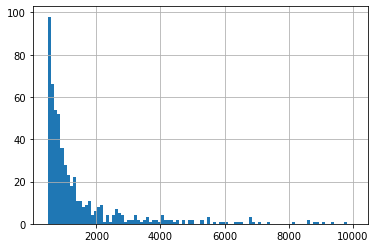

In [82]:
reunite['QMB_Only'].hist(bins=100, range=(500, 10000));

In [83]:
reunite = trial_frame.copy()

In [84]:
# impute 'QMB_Only' using GradientBoosting
trial_frame = reunite.copy()
reunite = predict_incomes('QMB_Only', reunite.copy(), 
                          GradientBoostingRegressor(), non_nulls,
                             test_size=.45)
reunite.shape

training r2 score:  0.970364819412632
test r2 score    :  0.5437413178034967
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american   

(3040, 49)

In [85]:
reunite.isna().sum()

state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american                                0
pct_hawaiian                                  

In [86]:
# impute 'QMB_plus_Full' using GradientBoosting
trial_frame = reunite.copy()
reunite = predict_incomes('QMB_plus_Full', reunite.copy(), 
                          GradientBoostingRegressor(), non_nulls,
                             test_size=.45)
reunite.shape

training r2 score:  0.9822860185901381
test r2 score    :  0.8356090997387505
state_abr                                         0
state                                             0
county                                            0
confirmed_cases                                   0
deaths                                            0
latitude                                          0
longitude                                         0
fips                                              0
percapita_income                                  0
median_household_income                           0
median_family_income                              0
number_of_households                              0
Population                                        0
pct_white                                         0
pct_black                                         0
pct_asian                                         0
pct_hispanic                                      0
pct_native_american                   

(3040, 49)

In [87]:
# impute 'SLMB_only' using GradientBoosting
trial_frame = reunite.copy()
reunite = predict_incomes('SLMB_only', reunite.copy(), 
                          GradientBoostingRegressor(), non_nulls,
                             test_size=.2)
reunite.shape

training r2 score:  0.9789870160021102
test r2 score    :  0.8348564585133856
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american  

(3040, 49)

We've come this far, let's write a loop that imputes the rest in this same way, using this same data:



In [88]:
trial_frame = reunite.copy()

for row in trial_frame.isna().sum().index:
    if trial_frame[row].isna().sum()>0:
        # impute the row with missing data using GradientBoosting
        
        print('Imputing data for ' + row)
        trial_frame = predict_incomes(row, reunite.copy(), 
                          GradientBoostingRegressor(), non_nulls,
                             test_size=.2)
        trial_frame.shape

Imputing data for geo_id
training r2 score:  0.4919393166918016
test r2 score    :  0.2775812422325501
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                     

training r2 score:  0.957130094645308
test r2 score    :  0.6818695669175732
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american   

training r2 score:  0.9986568251810645
test r2 score    :  0.9662159036048358
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american  

training r2 score:  0.9984242847882814
test r2 score    :  0.9370946296081886
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american  

## Drop columns that are unneccessary or had a low r2 score 

In [89]:
trial_frame.drop(columns='geo_id', inplace=True)
trial_frame.drop(columns='QDWI', inplace=True)

In [90]:
# Confident with the results, run it on the reunite df

for row in reunite.isna().sum().index:
    if reunite[row].isna().sum()>0:
        # impute the row with missing data using GradientBoosting
        
        print('Imputing data for ' + row)
        reunite = predict_incomes(row, reunite.copy(), 
                          GradientBoostingRegressor(), non_nulls,
                             test_size=.2)
        reunite.shape
        print('*'*20)

Imputing data for geo_id
training r2 score:  0.4919393166918016
test r2 score    :  0.2755072158828724
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                     

training r2 score:  0.951227191347358
test r2 score    :  0.4637994164303703
state_abr                                         0
state                                             0
county                                            0
confirmed_cases                                   0
deaths                                            0
latitude                                          0
longitude                                         0
fips                                              0
percapita_income                                  0
median_household_income                           0
median_family_income                              0
number_of_households                              0
Population                                        0
pct_white                                         0
pct_black                                         0
pct_asian                                         0
pct_hispanic                                      0
pct_native_american                    

training r2 score:  0.9987971110748729
test r2 score    :  0.947667586998836
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american   

training r2 score:  0.9985421432468473
test r2 score    :  0.8651458351233832
state_abr                                          0
state                                              0
county                                             0
confirmed_cases                                    0
deaths                                             0
latitude                                           0
longitude                                          0
fips                                               0
percapita_income                                   0
median_household_income                            0
median_family_income                               0
number_of_households                               0
Population                                         0
pct_white                                          0
pct_black                                          0
pct_asian                                          0
pct_hispanic                                       0
pct_native_american  

In [91]:
reunite.drop(columns='geo_id', inplace=True)
reunite.drop(columns='QDWI', inplace=True)

In [92]:
reunite.isna().sum()

state_abr                                        0
state                                            0
county                                           0
confirmed_cases                                  0
deaths                                           0
latitude                                         0
longitude                                        0
fips                                             0
percapita_income                                 0
median_household_income                          0
median_family_income                             0
number_of_households                             0
Population                                       0
pct_white                                        0
pct_black                                        0
pct_asian                                        0
pct_hispanic                                     0
pct_native_american                              0
pct_hawaiian                                     0
State_Abbr                     

## Now marry the pertinent columns with imputed data to the dataframe
In order to run the models, take the imputed data and return those columns to the original dataframe without the hard-to-interpret BEA data.

In [94]:
cov_inc.shape

(3070, 41)

In [95]:
reunite.shape

(3040, 47)

In [102]:
reunite['county_state'] = reunite['county'] + ', ' + reunite['state']
reunite.set_index('county_state', inplace=True)

In [116]:
reunite = reunite.drop(columns=bea)

In [124]:
result = cov_inc.merge(reunite, how='right')

In [125]:
result.shape

(3040, 43)

In [126]:
result.head(2)

state_abr      state          county  confirmed_cases  deaths  latitude  \
0        WI  Wisconsin    Adams County            316.0     4.0     43.97   
1        WI  Wisconsin  Ashland County            197.0     2.0     46.71   

   longitude     fips  percapita_income  median_household_income  ...  \
0     -89.77  55001.0           22196.0                  44897.0  ...   
1     -90.56  55003.0           21115.0                  38550.0  ...   

   SNAP_NPA_Participation_Persons  SNAP_All_Participation_Persons  \
0                          2604.0                          2958.0   
1                          2121.0                          2350.0   

   SNAP_PA_Participation_Households  SNAP_NPA_Participation_Households  \
0                             204.0                             1462.0   
1                             143.0                             1019.0   

   SNAP_All_Participation_Households  SNAP_All_Issuance  deaths_per_100k  \
0                             1666.0           542926.0        19.782394   
1                             1162.0           407986.0        12.851819   

   cases_per_100k  jobs_per_100k  av_household_earnings_per_100k  
0     1562.809100   22378.832839                    1.893358e+06  
1     1265.904125   54671.636036                    2.202699e+06  

[2 rows x 43 columns]

In [127]:
result.columns

Index(['state_abr', 'state', 'county', 'confirmed_cases', 'deaths', 'latitude',
       'longitude', 'fips', 'percapita_income', 'median_household_income',
       'median_family_income', 'number_of_households', 'Population',
       'pct_white', 'pct_black', 'pct_asian', 'pct_hispanic',
       'pct_native_american', 'pct_hawaiian', 'geo_id',
       'rental_percent_over_35_pcnt_income', 'rental_percent_LIHTC',
       'State_Abbr', 'County_Name', 'QMB_Only', 'QMB_plus_Full', 'SLMB_only',
       'SLMB_plus_Full', 'QDWI', 'QI', 'Other_full', 'Public_Total',
       'SNAP_PA_Participation_Persons', 'SNAP_NPA_Participation_Persons',
       'SNAP_All_Participation_Persons', 'SNAP_PA_Participation_Households',
       'SNAP_NPA_Participation_Households',
       'SNAP_All_Participation_Households', 'SNAP_All_Issuance',
       'deaths_per_100k', 'cases_per_100k', 'jobs_per_100k',
       'av_household_earnings_per_100k'],
      dtype='object')

In [128]:
result.isna().sum()

state_abr                                0
state                                    0
county                                   0
confirmed_cases                          0
deaths                                   0
latitude                                 0
longitude                                0
fips                                     0
percapita_income                         0
median_household_income                  0
median_family_income                     0
number_of_households                     0
Population                               0
pct_white                                0
pct_black                                0
pct_asian                                0
pct_hispanic                             0
pct_native_american                      0
pct_hawaiian                             0
geo_id                                1800
rental_percent_over_35_pcnt_income    1800
rental_percent_LIHTC                  1800
State_Abbr                               0
County_Name

In [131]:
result.drop(columns=['geo_id', 'rental_percent_over_35_pcnt_income', 'rental_percent_LIHTC',
                    'QDWI'], inplace=True)

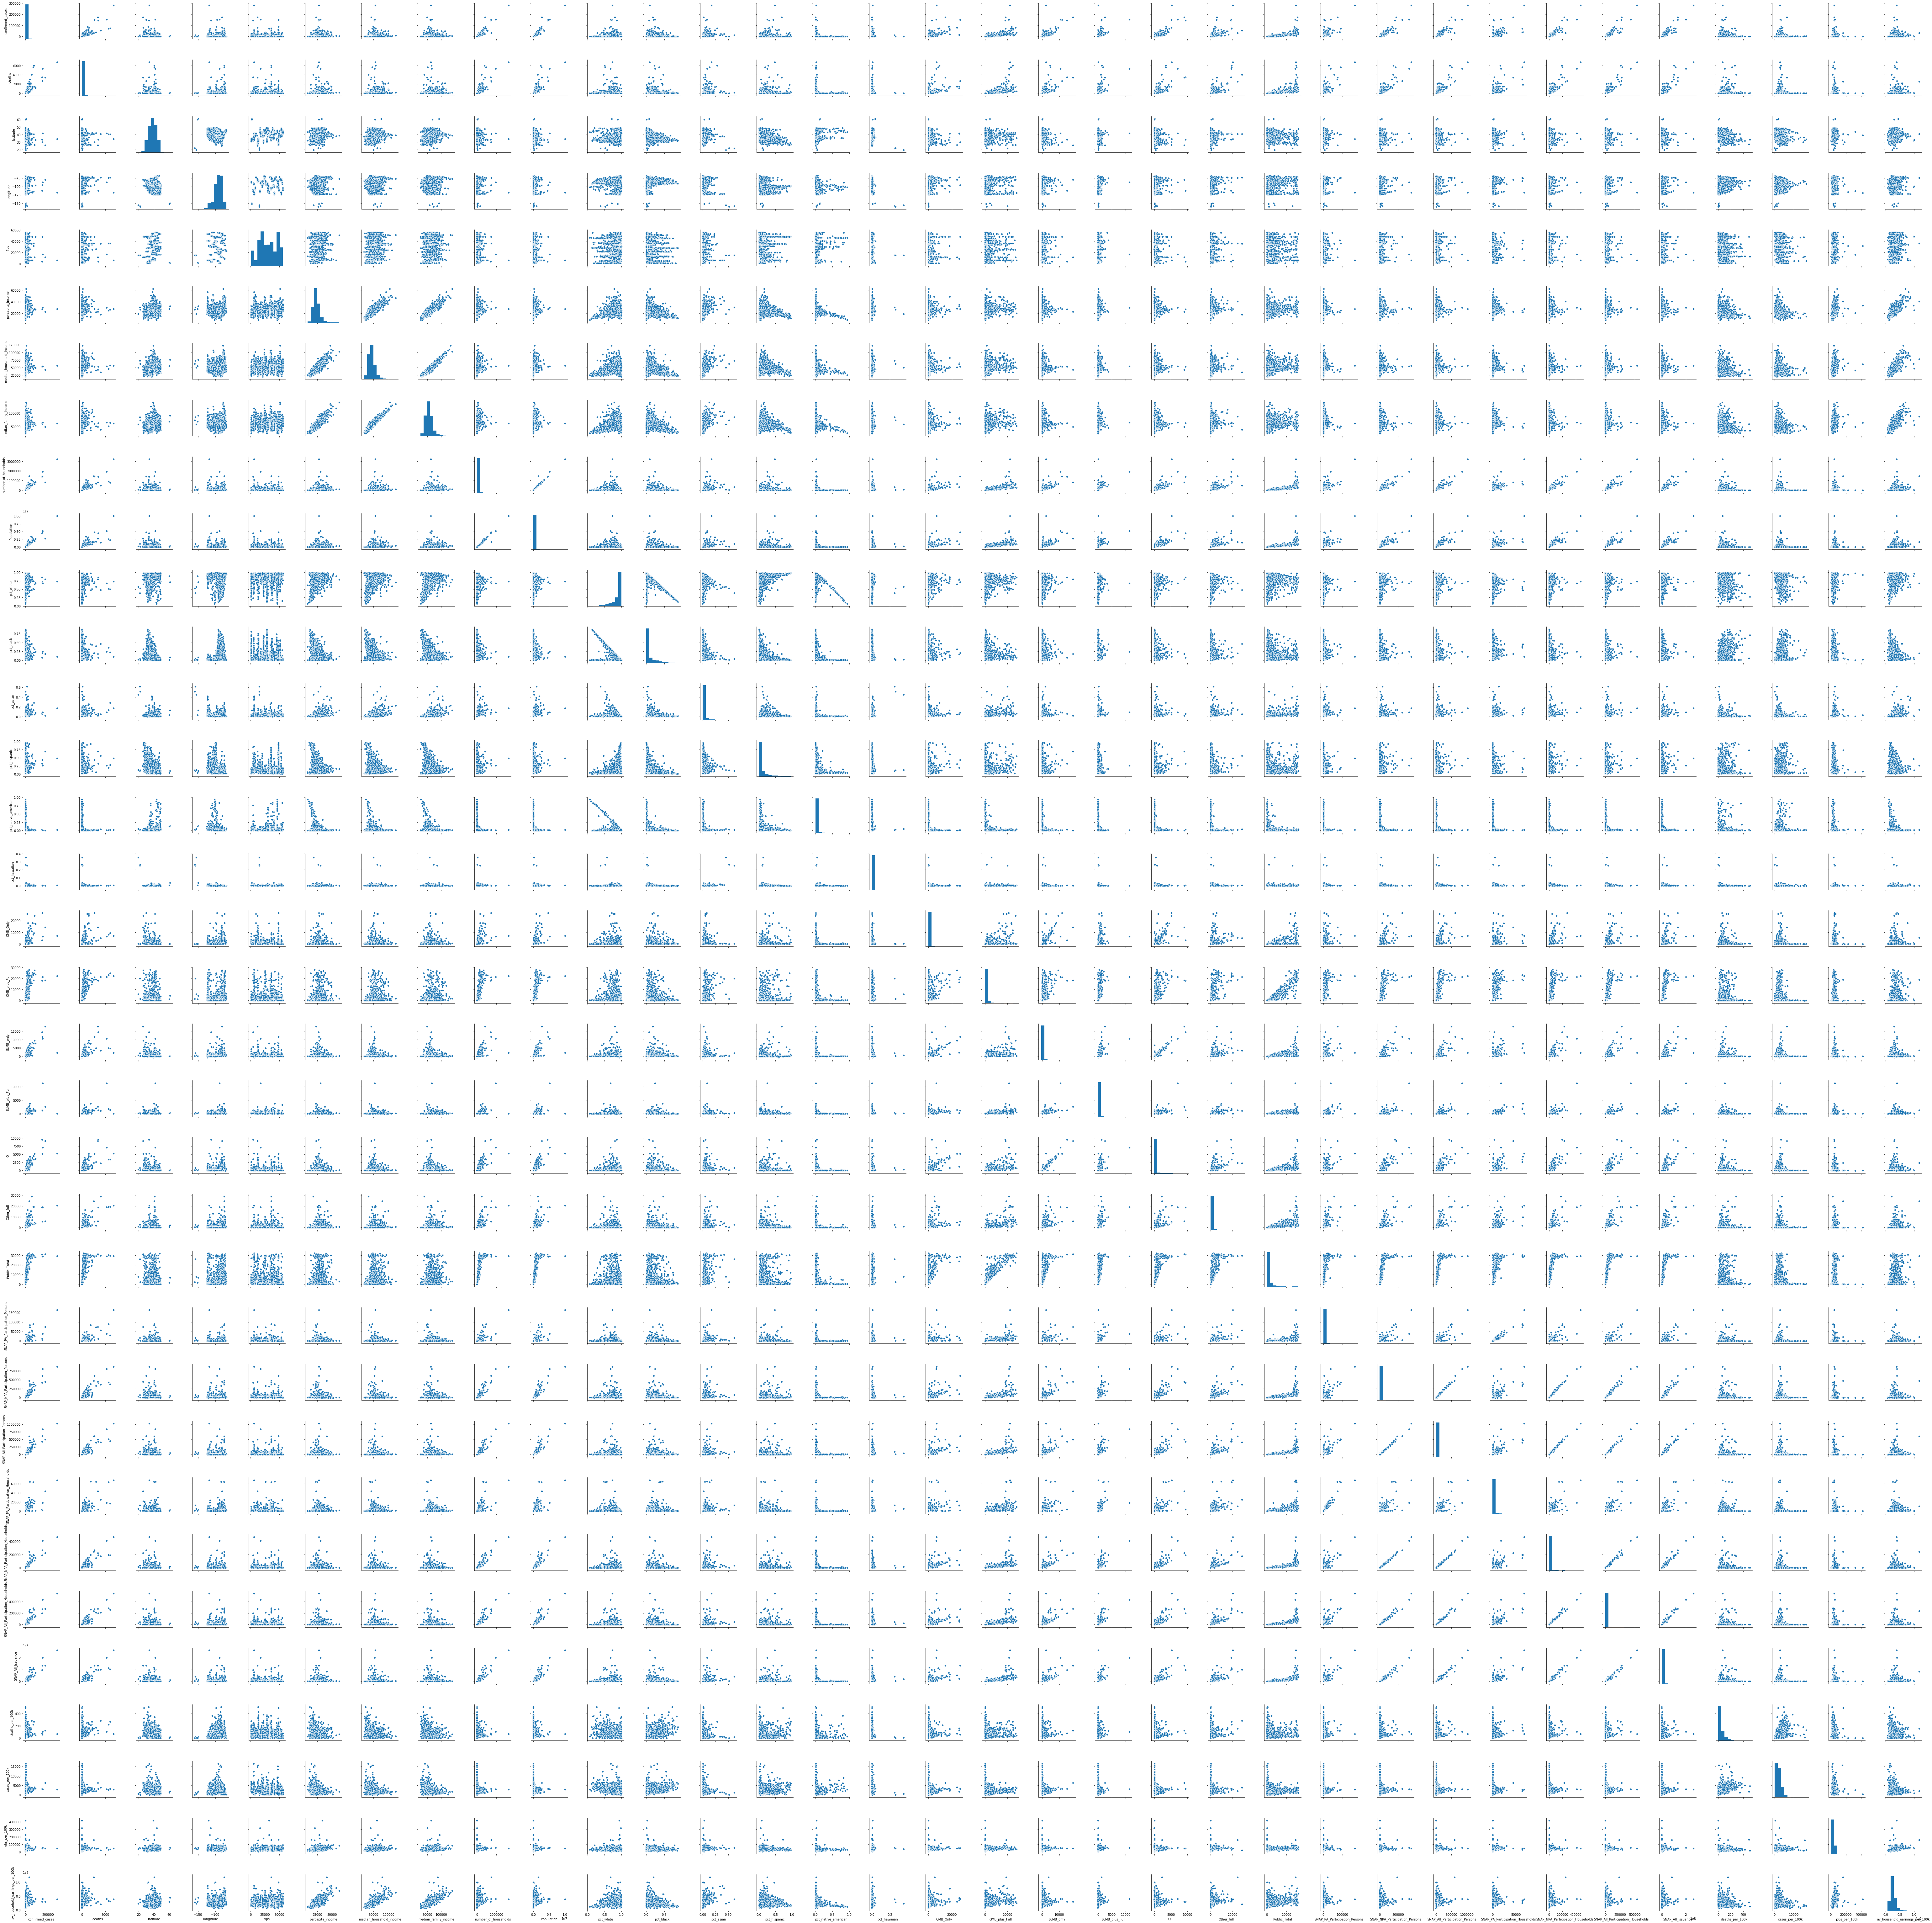

In [132]:
# commenting out this block as that was a LOT of pairplot computing...
# and the results don't look all too helpful because they are so small
# sns.pairplot(result)


In [134]:
result.to_csv(datapath + 'cov_soc_eco.csv', index=False)